In [14]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple mlxtend -U


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
# --- 安装依赖 ---
import sys, subprocess
for pkg in ("pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "statsmodels"):
    try:
        __import__(pkg); print(f"{pkg} 已安装")
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])


pandas 已安装
numpy 已安装
matplotlib 已安装
seaborn 已安装
statsmodels 已安装


中文字体启用： Noto Sans SC


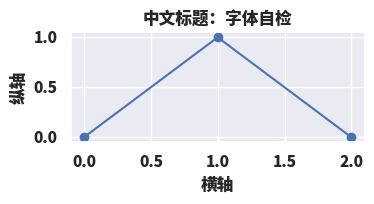

In [2]:
# --- 中文字体离线配置（使用本地 NotoSansSC-Black.ttf） ---
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
from pathlib import Path

# 本地字体文件（请将 NotoSansSC-Black.ttf 放在 Notebook 同目录）
FONT_FILE = Path("NotoSansSC-Black.ttf")

if not FONT_FILE.exists():
    raise FileNotFoundError(f"请把 {FONT_FILE} 放到当前目录下")

# 注册并获取字体名称
fm.fontManager.addfont(str(FONT_FILE.resolve()))
FONT_NAME = fm.FontProperties(fname=str(FONT_FILE.resolve())).get_name()

# 设置 Matplotlib & Seaborn 默认字体
rcParams["font.family"] = [FONT_NAME]
rcParams["axes.unicode_minus"] = False
sns.set_theme(font=FONT_NAME, rc={"axes.unicode_minus": False})

print("中文字体启用：", FONT_NAME)

# --- 验证 ---
plt.figure(figsize=(4,2.2))
plt.title("中文标题：字体自检")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.plot([0,1,2],[0,1,0], "o-")
plt.tight_layout()
plt.show()


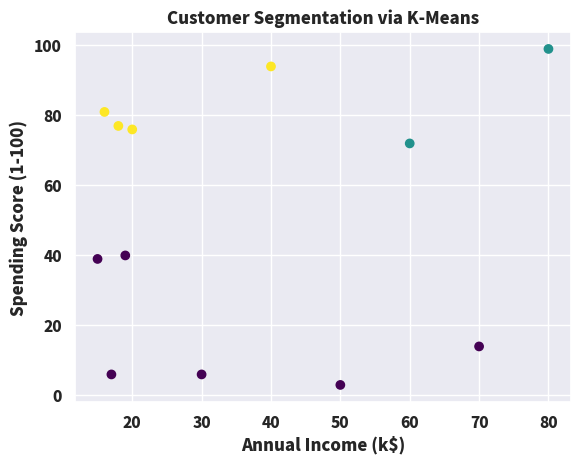

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 构造客户数据
customer_data = pd.DataFrame({
    'Annual_Income': [15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99]
})

# 运行 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(customer_data)

# 绘制聚类结果散点图
plt.scatter(
    customer_data['Annual_Income'], 
    customer_data['Spending_Score'],
    c=customer_data['Cluster'], cmap='viridis'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation via K-Means')
plt.show()


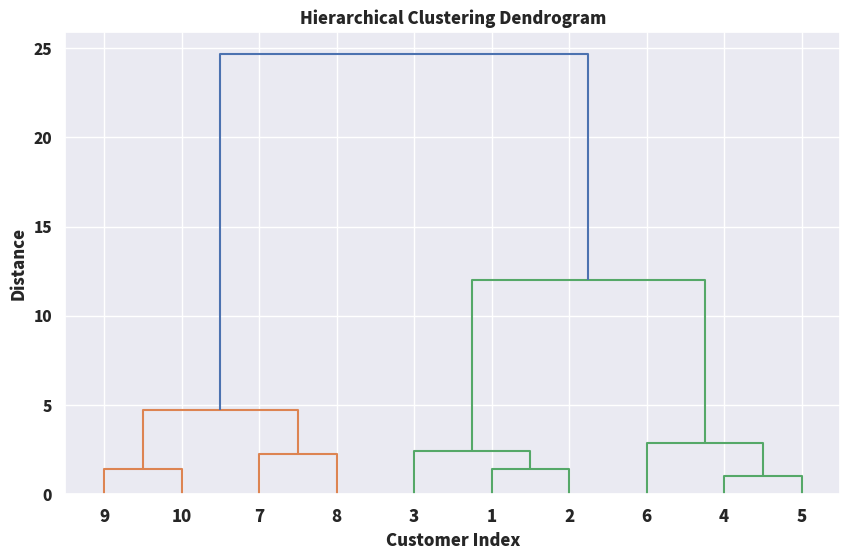

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 构造二维数据（每一行是一个点）
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [5, 8],
    [6, 8],
    [7, 10],
    [10, 12],
    [11, 14],
    [13, 14],
    [14, 15]
])

# 层次聚类
Z = linkage(X, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=np.arange(1, X.shape[0] + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()


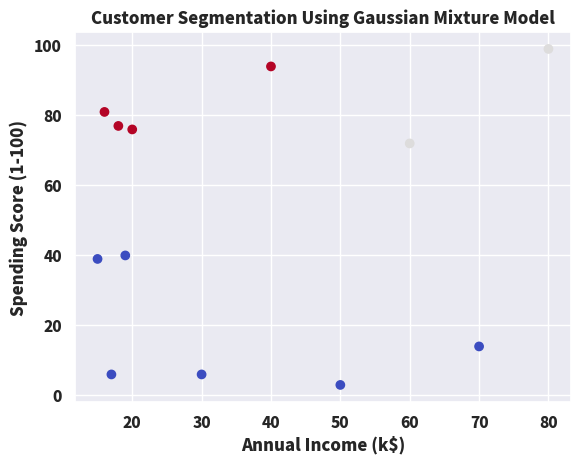

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 构造二维样本数据（每行一个点，两个特征：年收入 & 消费得分）
X = np.array([
    [15, 39],
    [16, 81],
    [17, 6],
    [18, 77],
    [19, 40],
    [20, 76],
    [30, 6],
    [40, 94],
    [50, 3],
    [60, 72],
    [70, 14],
    [80, 99]
])

# 高斯混合模型聚类
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X)

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title('Customer Segmentation Using Gaussian Mixture Model')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


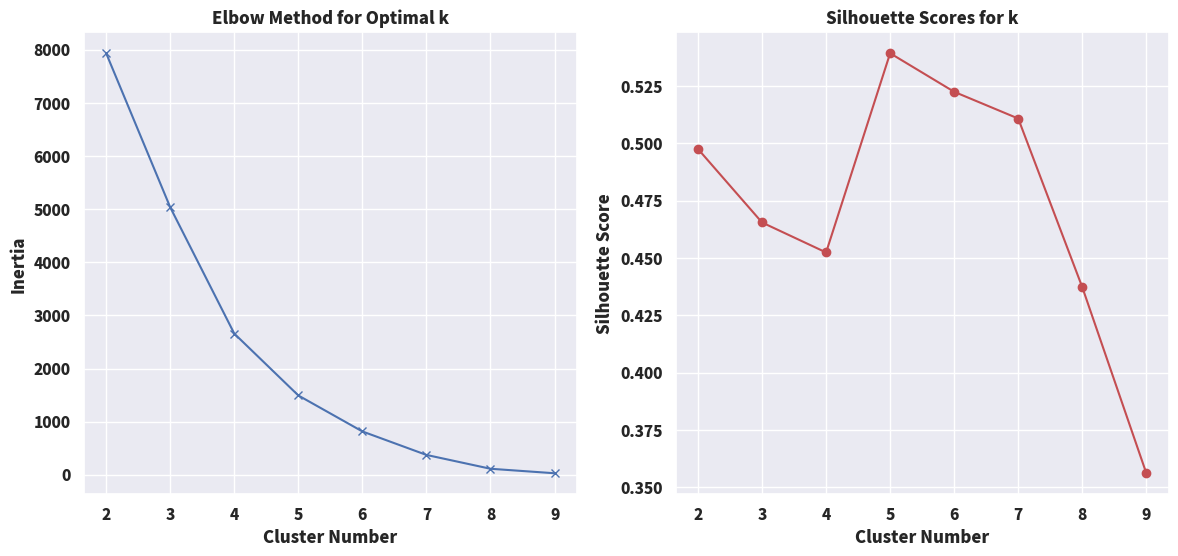

In [11]:
# --- Example 4 ---
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# X = customer_data.values  # 假设customer_data已加载

inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, 'ro-')
plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')

plt.show()

In [15]:
# --- Example 5 ---
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

dataset = [
    ['Bread', 'Milk', 'Butter'],
    ['Bread', 'Diapers', 'Beer', 'Eggs'],
    ['Milk', 'Diapers', 'Beer', 'Cola'],
    ['Bread', 'Milk', 'Diapers', 'Beer'],
    ['Bread', 'Milk', 'Diapers', 'Cola'],
]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents  support  confidence    lift
0      (Beer)   (Diapers)      0.6        1.00  1.2500
1   (Diapers)      (Beer)      0.6        0.75  1.2500
2     (Bread)   (Diapers)      0.6        0.75  0.9375
3   (Diapers)     (Bread)      0.6        0.75  0.9375
4      (Milk)     (Bread)      0.6        0.75  0.9375
5     (Bread)      (Milk)      0.6        0.75  0.9375
6      (Milk)   (Diapers)      0.6        0.75  0.9375
7   (Diapers)      (Milk)      0.6        0.75  0.9375


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 构造客户特征数据
customer_features = pd.DataFrame({
    'Age': [1, 3, 6, 12, 24, 36, 48, 60, 72, 6, 18, 30],
    'Annual_Income': [15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80]
})

# 构造交易数据
transactions = [
    ['Bread', 'Milk'],
    ['Bread', 'Diapers', 'Beer'],
    ['Milk', 'Diapers', 'Beer', 'Cola'],
    ['Bread', 'Milk', 'Diapers', 'Beer'],
    ['Milk', 'Bread'],
    ['Diapers', 'Bread', 'Beer'],
    ['Milk', 'Beer'],
    ['Bread', 'Milk', 'Cola'],
    ['Milk', 'Diapers'],
    ['Bread', 'Beer'],
    ['Bread', 'Milk', 'Diapers'],
    ['Diapers', 'Cola']
]

# 聚类
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(customer_features)

# 针对每个簇做关联规则分析
for cluster_num in customer_features['Cluster'].unique():
    cluster_indices = customer_features[customer_features['Cluster'] == cluster_num].index
    cluster_transactions = [transactions[i] for i in cluster_indices if i < len(transactions)]

    te = TransactionEncoder()
    te_ary = te.fit(cluster_transactions).transform(cluster_transactions)
    df_cluster = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(df_cluster, min_support=0.3, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

    print(f"Cluster {cluster_num} Rules:")
    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    else:
        print("No rules found")
    print('-' * 40)


Cluster 1 Rules:
        antecedents    consequents   support  confidence      lift
0            (Beer)        (Bread)  0.571429        0.80  0.933333
1            (Beer)      (Diapers)  0.571429        0.80  1.400000
2         (Diapers)         (Beer)  0.571429        1.00  1.400000
3         (Diapers)        (Bread)  0.428571        0.75  0.875000
4            (Milk)        (Bread)  0.428571        0.75  0.875000
5     (Beer, Bread)      (Diapers)  0.428571        0.75  1.312500
6   (Beer, Diapers)        (Bread)  0.428571        0.75  0.875000
7  (Bread, Diapers)         (Beer)  0.428571        1.00  1.400000
8         (Diapers)  (Beer, Bread)  0.428571        0.75  1.312500
----------------------------------------
Cluster 0 Rules:
  antecedents consequents  support  confidence  lift
0     (Bread)      (Milk)      0.4         1.0  1.25
----------------------------------------


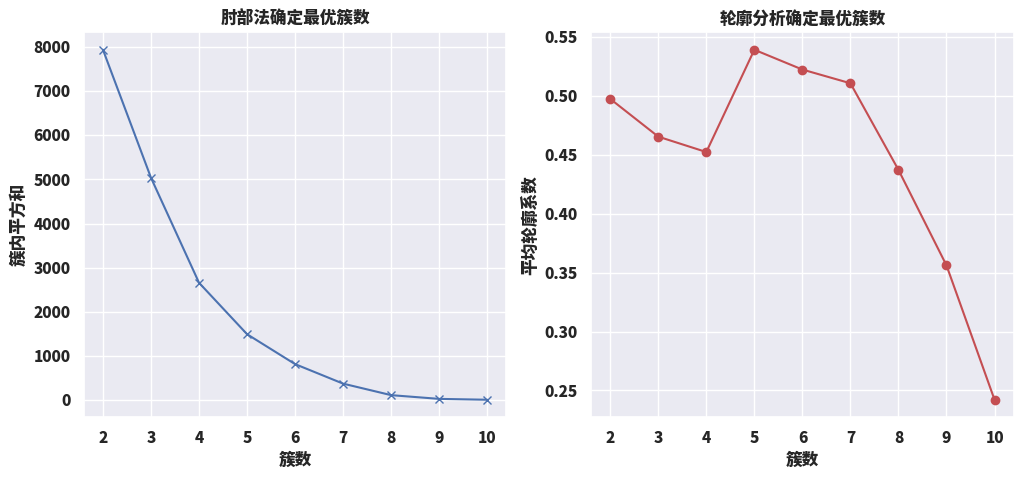

In [18]:
# --- Example 7 ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# X = # 预处理后的数据集
inertia = []
silhouette_avg = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('簇数')
plt.ylabel('簇内平方和')
plt.title('肘部法确定最优簇数')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_avg, 'ro-')
plt.xlabel('簇数')
plt.ylabel('平均轮廓系数')
plt.title('轮廓分析确定最优簇数')

plt.show()

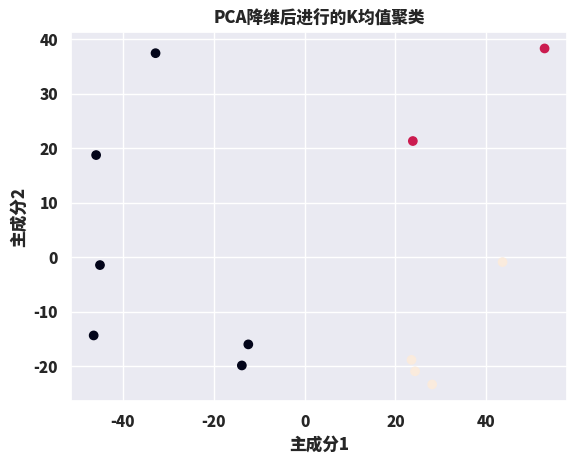

In [19]:
# --- Example 8 ---
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X = # 高维数据集
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('PCA降维后进行的K均值聚类')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.show()

平均轮廓系数: 0.452


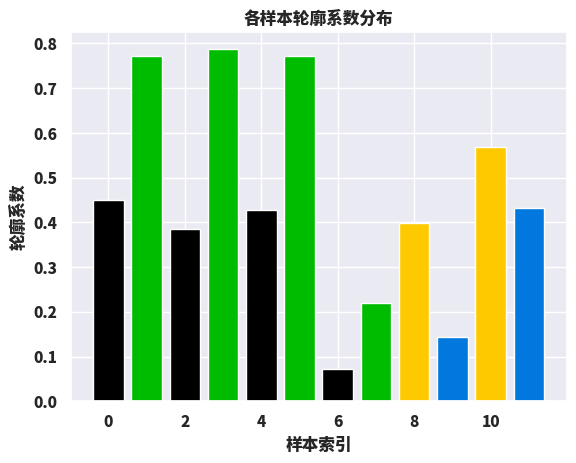

In [20]:
from sklearn.cluster import KMeans

# --- Example 9 ---
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# X = # 数据
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

sil_score = silhouette_score(X, labels)
print(f'平均轮廓系数: {sil_score:.3f}')

sil_vals = silhouette_samples(X, labels)
plt.bar(range(len(X)), sil_vals, color=[plt.cm.nipy_spectral(l/4) for l in labels])
plt.xlabel('样本索引')
plt.ylabel('轮廓系数')
plt.title('各样本轮廓系数分布')
plt.show()

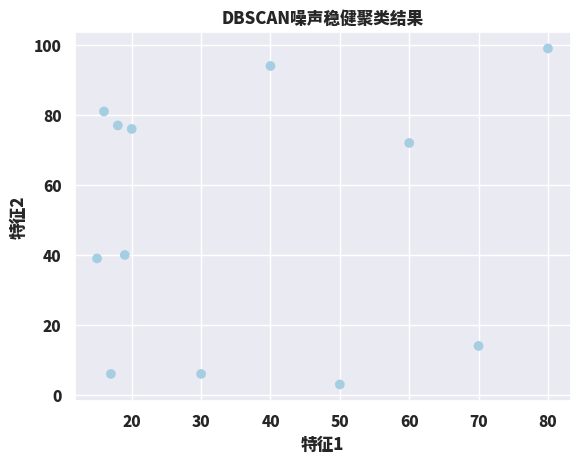

In [21]:
# --- Example 10 ---
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# X = # 含噪声数据
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', marker='o')
plt.title('DBSCAN噪声稳健聚类结果')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.show()

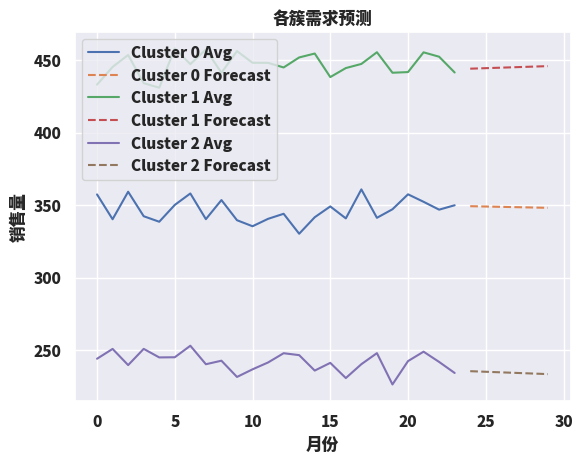

In [22]:
# --- Example 11 ---
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

np.random.seed(42)
months = 24
sales_data = pd.DataFrame({
f'store_{i}': np.random.poisson(lam=200 + i*10, size=months)
    + np.random.normal(0, 15, months)
    for i in range(30)
})

sales_patterns = sales_data.T

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(sales_patterns)

for cluster_label in np.unique(clusters):
    cluster_stores = sales_patterns.index[clusters == cluster_label]
    avg_sales = sales_patterns.loc[cluster_stores].mean()

    model = ExponentialSmoothing(avg_sales, trend='add', seasonal=None)
    model_fit = model.fit(smoothing_level=0.8)
    forecast = model_fit.forecast(6)

    plt.plot(avg_sales.index, avg_sales.values, label=f'Cluster {cluster_label} Avg')
    plt.plot(forecast.index, forecast.values, linestyle='--', label=f'Cluster {cluster_label} Forecast')

plt.xlabel('月份')
plt.ylabel('销售量')
plt.legend()
plt.title('各簇需求预测')
plt.show()

In [24]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans

# ---- 模拟 RFM 数据 ----
customer_rfm = pd.DataFrame({
    'Recency':   [10, 20, 30, 40, 50, 15, 25, 35, 45, 55],
    'Frequency': [ 5,  4,  3,  6,  2,  8,  7,  5,  3,  9],
    'Monetary':  [100, 80, 60, 120, 50, 200, 150, 90, 70, 300]
}, index=[f"C{i}" for i in range(1, 11)])

# ---- 模拟交易数据 ----
transactional_data = pd.DataFrame({
    'InvoiceNo': ['INV1','INV1','INV2','INV2','INV3','INV3','INV4','INV4','INV5','INV5'],
    'CustomerID': ['C1','C1','C2','C2','C3','C3','C4','C4','C5','C5'],
    'Product': ['Bread','Milk','Bread','Beer','Diapers','Milk','Beer','Cola','Bread','Beer']
})

# ---- KMeans 聚类 ----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_rfm['Cluster'] = kmeans.fit_predict(customer_rfm[['Recency','Frequency','Monetary']])

# ---- 各簇关联规则分析 ----
for cluster in customer_rfm['Cluster'].unique():
    cluster_customers = customer_rfm[customer_rfm['Cluster'] == cluster].index
    cluster_transactions = transactional_data[transactional_data['CustomerID'].isin(cluster_customers)]

    if cluster_transactions.empty:
        print(f"Cluster {cluster} 没有交易记录")
        continue

    # 交易篮子矩阵
    basket = cluster_transactions.pivot_table(index='InvoiceNo', columns='Product',
                                              aggfunc='size', fill_value=0)

    frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

    print(f"\nCluster {cluster} 规则:")
    if not rules.empty:
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    else:
        print("没有满足条件的规则")



Cluster 0 规则:
  antecedents consequents  support  confidence      lift
0      (Beer)     (Bread)      0.4    0.666667  1.111111
1     (Bread)      (Beer)      0.4    0.666667  1.111111
2      (Cola)      (Beer)      0.2    1.000000  1.666667
3      (Beer)      (Cola)      0.2    0.333333  1.666667
4      (Milk)   (Diapers)      0.2    0.500000  2.500000
5   (Diapers)      (Milk)      0.2    1.000000  2.500000
Cluster 1 没有交易记录
Cluster 2 没有交易记录


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
# --- Example 13 ---
import pandas as pd
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

data = pd.read_csv('retail_transactions.csv')
customer_features = data.groupby('CustomerID').agg({'PurchaseAmount': 'sum', 'VisitFrequency': 'count'}).reset_index()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[['PurchaseAmount', 'VisitFrequency']])

for cluster in customer_features['Cluster'].unique():
    cluster_customers = customer_features[customer_features['Cluster'] == cluster]['CustomerID']
    cluster_tx = data[data['CustomerID'].isin(cluster_customers)]
    transactions = cluster_tx.groupby('InvoiceNo')['Product'].apply(list).tolist()

    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_basket = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

    print(f"簇 {cluster} 的关联规则:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    monthly_sales = cluster_tx.groupby(cluster_tx['Date'].dt.to_period('M'))['PurchaseAmount'].sum()
    model = ExponentialSmoothing(monthly_sales, trend='add').fit()
    forecast = model.forecast(3)
    plt.plot(monthly_sales.index.to_timestamp(), monthly_sales, label='销售额')
    plt.plot(forecast.index.to_timestamp(), forecast, label='预测', linestyle='--')
    plt.title(f'簇 {cluster} 需求预测')
    plt.legend()
    plt.show()

KeyError: 'CustomerID'

In [26]:
import pandas as pd
import numpy as np
import random

random.seed(42)
np.random.seed(42)

# ---------- 制造业设备故障 ----------
machines = [f"Machine{i}" for i in range(1, 21)]
failure_types = [
    "Motor_Fail", "Bearing_Wear", "Overheat", "Hydraulic_Leak", "Vibration",
    "Control_Error", "Seal_Damage", "Cooling_Fail", "Sensor_Error", "Power_Surge"
]

manufacturing_records = []
for idx, m in enumerate(machines, start=1):
    n = random.randint(3, 6)
    failures = random.sample(failure_types, n)
    manufacturing_records.append({
        "TransactionID": f"MF{idx:03d}",
        "Type": "Manufacturing_Failure",
        "Items": failures
    })

# ---------- 服务业订单延迟 ----------
orders = [f"Order{1000+i}" for i in range(1, 31)]
delay_reasons = [
    "Batch_Size_Large", "Supplier_Delay", "Approval_Wait", "System_Issue",
    "Data_Error", "Staff_Shortage", "Holiday_Backlog", "Transport_Issue", "Payment_Hold"
]

service_records = []
for idx, o in enumerate(orders, start=1):
    n = random.randint(2, 4)
    reasons = random.sample(delay_reasons, n)
    service_records.append({
        "TransactionID": f"SD{idx:03d}",
        "Type": "Service_Delay",
        "Items": reasons
    })

# ---------- 合并并保存 ----------
all_records = manufacturing_records + service_records
df = pd.DataFrame(all_records)

df.to_csv("retail_transactions.csv", index=False)

print("已生成 retail_transactions.csv，包含制造业故障与服务业延迟两类事务。")


已生成 retail_transactions.csv，包含制造业故障与服务业延迟两类事务。
